1


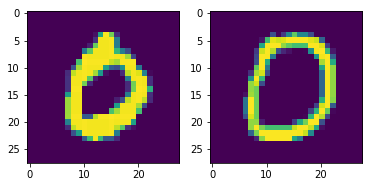

In [7]:
'''Train a Siamese MLP on pairs of digits from the MNIST dataset.

It follows Hadsell-et-al.'06 [1] by computing the Euclidean distance on the
output of the shared network and by optimizing the contrastive loss (see paper
for mode details).

[1] "Dimensionality Reduction by Learning an Invariant Mapping"
    http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf

Gets to 97.2% test accuracy after 20 epochs.
2 seconds per epoch on a Titan X Maxwell GPU
'''
from __future__ import absolute_import
from __future__ import print_function
import numpy as np

import random
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Dropout, Input, Lambda
from keras.optimizers import RMSprop
from keras import backend as K

%matplotlib inline
import matplotlib.pyplot as plt

num_classes = 10


def euclidean_distance(vects):
    x, y = vects
    return K.sqrt(K.maximum(K.sum(K.square(x - y), axis=1, keepdims=True), K.epsilon()))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)


def contrastive_loss(y_true, y_pred):
    '''Contrastive loss from Hadsell-et-al.'06
    http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    '''
    margin = 1
    return K.mean(y_true * K.square(y_pred) +
                  (1 - y_true) * K.square(K.maximum(margin - y_pred, 0)))


def create_pairs(x, digit_indices):
    '''Positive and negative pair creation.
    Alternates between positive and negative pairs.
    '''
    pairs = []
    labels = []
    n = min([len(digit_indices[d]) for d in range(num_classes)]) - 1
    for d in range(num_classes):
        for i in range(n):
            z1, z2 = digit_indices[d][i], digit_indices[d][i + 1]
            pairs += [[x[z1], x[z2]]]
            inc = random.randrange(1, num_classes)
            dn = (d + inc) % num_classes
            z1, z2 = digit_indices[d][i], digit_indices[dn][i]
            pairs += [[x[z1], x[z2]]]
            labels += [1, 0]
    return np.array(pairs), np.array(labels)


def create_base_network(input_dim):
    '''Base network to be shared (eq. to feature extraction).
    '''
    input = Input(shape=(input_dim,))
    x = Dense(128, activation='relu')(input)
    x = Dropout(0.1)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = Dense(128, activation='relu')(x)
    return Model(input, x)


def compute_accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    pred = y_pred.ravel() < 0.5
    return np.mean(pred == y_true)


def accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    return K.mean(K.equal(y_true, K.cast(y_pred < 0.5, y_true.dtype)))


# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
input_dim = 784
epochs = 20

# create training+test positive and negative pairs
digit_indices = [np.where(y_train == i)[0] for i in range(num_classes)]
tr_pairs, tr_y = create_pairs(x_train, digit_indices)

digit_indices = [np.where(y_test == i)[0] for i in range(num_classes)]
te_pairs, te_y = create_pairs(x_test, digit_indices)
def show_nth(n):
    plt.subplot(1,2,1)
    plt.imshow(te_pairs[n][0].reshape(28,28))
    print(te_y[n])
    plt.subplot(1,2,2)
    plt.imshow(te_pairs[n][1].reshape(28,28))
show_nth(0)
# # network definition
# base_network = create_base_network(input_dim)

# input_a = Input(shape=(input_dim,))
# input_b = Input(shape=(input_dim,))

# # because we re-use the same instance `base_network`,
# # the weights of the network
# # will be shared across the two branches
# processed_a = base_network(input_a)
# processed_b = base_network(input_b)

# distance = Lambda(euclidean_distance,
#                   output_shape=eucl_dist_output_shape)([processed_a, processed_b])

# model = Model([input_a, input_b], distance)

# # train
# rms = RMSprop()
# model.compile(loss=contrastive_loss, optimizer=rms, metrics=[accuracy])
# model.fit([tr_pairs[:, 0], tr_pairs[:, 1]], tr_y,
#           batch_size=128,
#           epochs=epochs,
#           validation_data=([te_pairs[:, 0], te_pairs[:, 1]], te_y))

# # compute final accuracy on training and test sets
# y_pred = model.predict([tr_pairs[:, 0], tr_pairs[:, 1]])
# tr_acc = compute_accuracy(tr_y, y_pred)
# y_pred = model.predict([te_pairs[:, 0], te_pairs[:, 1]])
# te_acc = compute_accuracy(te_y, y_pred)

# print('* Accuracy on training set: %0.2f%%' % (100 * tr_acc))
# print('* Accuracy on test set: %0.2f%%' % (100 * te_acc))


0


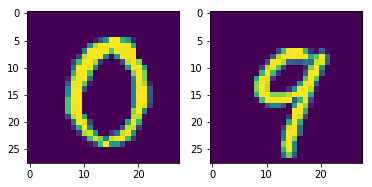

In [13]:
show_nth(5)

0.0


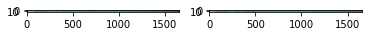

In [14]:
'''Train a Siamese MLP on pairs of digits from the MNIST dataset.

It follows Hadsell-et-al.'06 [1] by computing the Euclidean distance on the
output of the shared network and by optimizing the contrastive loss (see paper
for mode details).

[1] "Dimensionality Reduction by Learning an Invariant Mapping"
    http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf

Gets to 97.2% test accuracy after 20 epochs.
2 seconds per epoch on a Titan X Maxwell GPU
'''
from __future__ import absolute_import
from __future__ import print_function
import numpy as np

# import random
# from keras.datasets import mnist
from speech_data import speech_model_data
from keras.models import Model
from keras.layers import Input, Dense, Dropout, SimpleRNN, LSTM, Lambda
# Dense, Dropout, Input, Lambda, LSTM, SimpleRNN
from keras.optimizers import RMSprop, SGD
from keras.callbacks import TensorBoard
from keras import backend as K


def euclidean_distance(vects):
    x, y = vects
    return K.sqrt(K.maximum(K.sum(K.square(x - y), axis=1, keepdims=True),
                            K.epsilon()))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)


def contrastive_loss(y_true, y_pred):
    '''Contrastive loss from Hadsell-et-al.'06
    http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    '''
    margin = 1
    # print(y_true, y_pred)
    return K.mean(y_true * K.square(y_pred) +
                  (1 - y_true) * K.square(K.maximum(margin - y_pred, 0)))


def create_base_rnn_network(input_dim):
    '''Base network to be shared (eq. to feature extraction).
    '''
    inp = Input(shape=input_dim)
    # d1 = Dense(1024, activation='sigmoid')(inp)
    # # d2 = Dense(2, activation='sigmoid')(d1)
    ls1 = LSTM(1024, return_sequences=True)(inp)
    ls2 = LSTM(512, return_sequences=True)(ls1)
    ls3 = LSTM(32)(ls2)  # , return_sequences=True
    # sr2 = SimpleRNN(128, return_sequences=True)(sr1)
    # sr3 = SimpleRNN(32)(sr2)
    # x = Dense(128, activation='relu')(sr1)
    return Model(inp, ls3)

def create_base_network(input_dim):
    '''Base network to be shared (eq. to feature extraction).
    '''
    input = Input(shape=input_dim)
    x = Dense(128, activation='relu')(input)
    x = Dropout(0.1)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = Dense(128, activation='relu')(x)
    return Model(input, x)

def compute_accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    pred = y_pred.ravel() < 0.5
    return np.mean(pred == y_true)


def accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    return K.mean(K.equal(y_true, K.cast(y_pred < 0.5, y_true.dtype)))


# the data, shuffled and split between train and test sets
tr_pairs, te_pairs, tr_y, te_y = speech_model_data()

# y_train.shape,y_test.shape
# x_train.shape,x_test.shape
# x_train = x_train.reshape(60000, 784)
# x_test = x_test.reshape(10000, 784)
# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255

# input_dim = (tr_pairs.shape[2], tr_pairs.shape[3])
# epochs = 20

# # network definition
# base_network = create_base_rnn_network(input_dim)
# input_a = Input(shape=input_dim)
# input_b = Input(shape=input_dim)

# # because we re-use the same instance `base_network`,
# # the weights of the network
# # will be shared across the two branches
# processed_a = base_network(input_a)
# processed_b = base_network(input_b)

# distance = Lambda(euclidean_distance,
#                   output_shape=eucl_dist_output_shape)(
#     [processed_a, processed_b]
# )

# model = Model([input_a, input_b], distance)

# tb_cb = TensorBoard(log_dir='./siamese_logs', histogram_freq=1, batch_size=32,
#                     write_graph=True, write_grads=True, write_images=True,
#                     embeddings_freq=0, embeddings_layer_names=None,
#                     embeddings_metadata=None)
# # train
# rms = RMSprop(lr=0.00001)  # lr=0.001)
# sgd = SGD(lr=0.001)
# model.compile(loss=contrastive_loss, optimizer=rms, metrics=[accuracy])
# model.fit([tr_pairs[:, 0], tr_pairs[:, 1]], tr_y,
#           batch_size=128,
#           epochs=epochs,
#           validation_data=([te_pairs[:, 0], te_pairs[:, 1]], te_y),
#           callbacks=[tb_cb])

# # compute final accuracy on training and test sets
# y_pred = model.predict([tr_pairs[:, 0], tr_pairs[:, 1]])
# tr_acc = compute_accuracy(tr_y, y_pred)
# y_pred = model.predict([te_pairs[:, 0], te_pairs[:, 1]])
# te_acc = compute_accuracy(te_y, y_pred)

# print('* Accuracy on training set: %0.2f%%' % (100 * tr_acc))
# print('* Accuracy on test set: %0.2f%%' % (100 * te_acc))


0.0


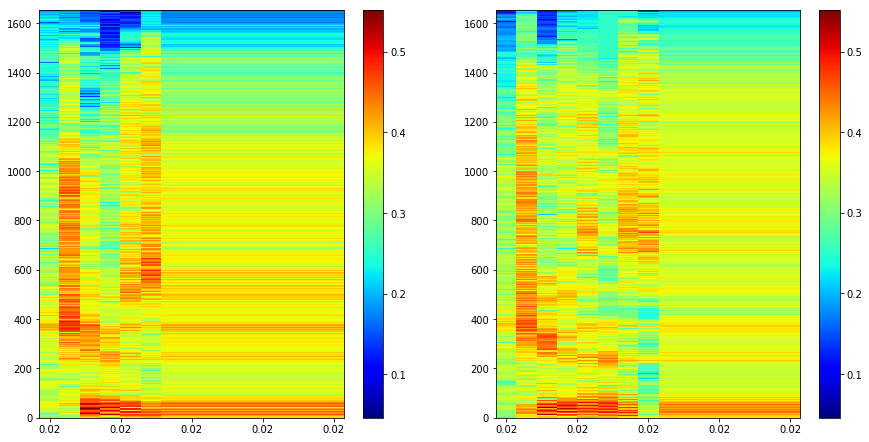

In [28]:
def plot_spec(ims):
    timebins, freqbins = np.shape(ims)
    # import pdb;pdb.set_trace()
#     plt.figure(figsize=(15, 7.5))
    plt.imshow(np.transpose(ims), origin="lower", aspect="auto", cmap="jet", interpolation="none")
    plt.colorbar()
    xlocs = np.float32(np.linspace(0, timebins-1, 5))
    plt.xticks(xlocs, ["%.02f" % l for l in ((xlocs*15/timebins)+(0.5*2**10))/22100])
    ylocs = np.int16(np.round(np.linspace(0, freqbins-1, 10)))
#     plt.yticks(ylocs, ["%.02f" % freq[i] for i in ylocs])
    
def show_nth(n):
    plt.figure(figsize=(15,7.5))
    plt.subplot(1,2,1)
    plot_spec(te_pairs[n][0].reshape(15,1654))
    print(te_y[n])
    plt.subplot(1,2,2)
    plot_spec(te_pairs[n][1].reshape(15,1654))
show_nth(0)